# Landfill (LF)

In [1]:
# Import libraries
from swolfpy_processmodels import LF
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [76]:
model = LF()
model.GasColPlan

,Parameter Description,Unit,Typical,Best Case,Worst Case,California
Parameter Name,,,,,,
initColTime,Time until initial gas collection,years,2.0,0.5,5.0,1.0
initColEff,Initial gas collection efficiency,%,50.0,50.0,50.0,50.0
cellFillTime,Cell fill time,years,5.0,3.0,5.0,2.0
intColEff,Gas collection efficiency under intermediate cover,%,75.0,75.0,75.0,80.0
incColTime,Time to increased gas collection efficiency,years,15.0,15.0,15.0,8.0
incColEff,Increased gas collection efficiency,%,82.5,82.5,82.5,85.0
timeToFinCover,Time from final waste placement to final cover,years,1.0,1.0,1.0,1.0
finColEff,Gas collection efficiency under final cover,%,90.0,90.0,90.0,90.0
enrgOn,Energy recovery cuton time,years,NaN,NaN,NaN,NaN


In [3]:
model.calc()
model._potential_LFG.head()

,Average Collection Eff,waste Mg/year,Methane Generated m3/year,Methane Collected m3/year,LFG Collected cfm,NMOC CutOn Mg/yr,NMOC CutOff Mg/yr
0,29.629630,233091.0,9.139629e+05,2.708038e+05,36.390242,26.194109,1.154481
1,45.555556,233091.0,1.792089e+06,6.708389e+05,90.146408,51.361132,2.859896
2,60.555556,233091.0,2.635783e+06,1.181743e+06,158.800931,75.541342,5.037962
3,65.679012,233091.0,3.446395e+06,1.714145e+06,230.344400,98.773432,7.307680
4,70.802469,233091.0,4.225223e+06,2.265574e+06,304.444707,121.094579,9.658514


## Potential LFG collection Efficiency

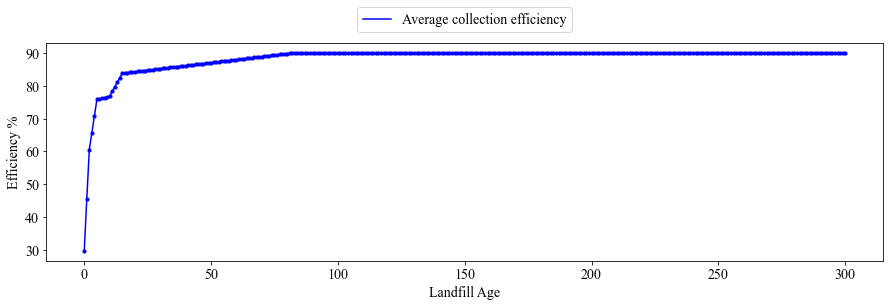

In [4]:
fig, ax=plt.subplots(figsize=(15, 4))
ax.plot(list(range(model.timescale)),
        model._potential_LFG['Average Collection Eff'],
        label='Average collection efficiency', c='b')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['Average Collection Eff'], c='b', s=10)

ax.set_ylabel('Efficiency %')
ax.set_xlabel('Landfill Age')
ax.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center')

## Potential LGF generation vs collection

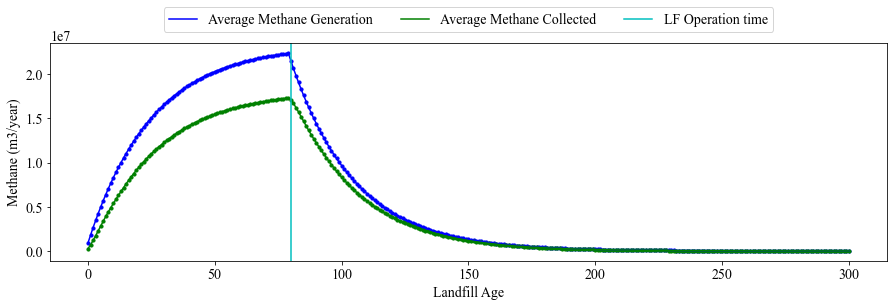

In [5]:
fig, ax=plt.subplots(figsize=(15, 4))

ax.plot(list(range(model.timescale)),
        model._potential_LFG['Methane Generated m3/year'],
        label='Average Methane Generation', c='b')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['Methane Generated m3/year'], c='b', s=10)

ax.plot(list(range(model.timescale)),
        model._potential_LFG['Methane Collected m3/year'],
        label='Average Methane Collected', c='g')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['Methane Collected m3/year'], c='g', s=10)

ax.axvline(model.InputData.LF_Op['optime']['amount'], label='LF Operation time', c='c')


ax.set_ylabel('Methane (m3/year)')
ax.set_xlabel('Landfill Age')
ax.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)

## Schedule for energy recovery

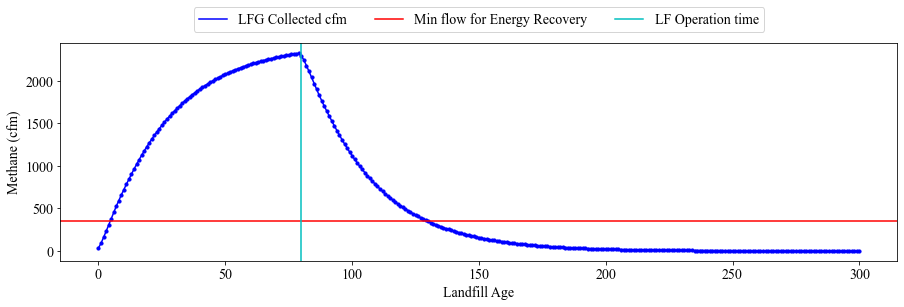

In [6]:
fig, ax=plt.subplots(figsize=(15, 4))
ax.plot(list(range(model.timescale)),
        model._potential_LFG['LFG Collected cfm'],
        label='LFG Collected cfm', c='b')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['LFG Collected cfm'], c='b', s=10)

ax.axhline(model.InputData.Energy_Rec['MinFowRec']['amount'], label='Min flow for Energy Recovery', c='r')
ax.axvline(model.InputData.LF_Op['optime']['amount'], label='LF Operation time', c='c')

ax.set_ylabel('Methane (cfm)')
ax.set_xlabel('Landfill Age')
ax.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)

## Schedule for Flare

In [73]:
pd.DataFrame(model.InputData.Flare).T.iloc[:, :3]

,Parameter Description,amount,unit
NMOC_Conc,Mandated NMOC cuton concentration,4000.0,ppmv
NMOC_Conc_actual,Actual NMOC concentration for cutoff,595.0,ppmv
NMOC_MW,NMOC molecular weight,86.18,g/mol
NMOC_Cufoff,NMOC cutoff,34.0,Mg/yr
Temp,Temperature to revise concentration,20.0,C
MinYr,Flare min time on,15.0,years
TimeReq,Number of years flare must operate after operations cease,15.0,years
Flow_cutoff,Flare runs until below gas flow rate,0,0/1
Flow_req,Minimum allowable gas flow rate,350.0,cfm
FlareCombEff,Flare methane destruction efficiency,99.9,%


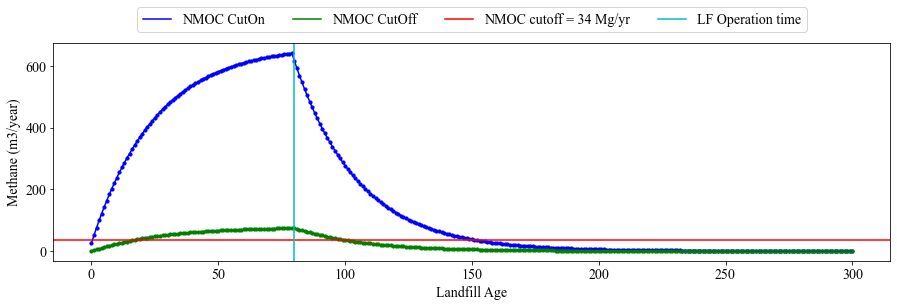

In [7]:
fig, ax=plt.subplots(figsize=(15, 4))

ax.plot(list(range(model.timescale)),
        model._potential_LFG['NMOC CutOn Mg/yr'],
        label='NMOC CutOn', c='b')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['NMOC CutOn Mg/yr'], c='b', s=10)

ax.plot(list(range(model.timescale)),
        model._potential_LFG['NMOC CutOff Mg/yr'],
        label='NMOC CutOff', c='g')
ax.scatter(list(range(model.timescale)),
           model._potential_LFG['NMOC CutOff Mg/yr'], c='g', s=10)

ax.axhline(model.InputData.Flare['NMOC_Cufoff']['amount'], label='NMOC cutoff = 34 Mg/yr', c='r')
ax.axvline(model.InputData.LF_Op['optime']['amount'], label='LF Operation time', c='c')

ax.set_ylabel('Methane (m3/year)')
ax.set_xlabel('Landfill Age')
ax.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=4)

## Landfill schedule  (Comparing plans)

### k=0.04

In [34]:
model.InputData.LFG_param['actk']['amount'] = 0.04
model.InputData.LFG_param['LFG_col_plan']['amount'] = 0
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 1
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 2
model._Cal_LFG_Col_Ox()


# California
model.InputData.LFG_param['LFG_col_plan']['amount'] = 3
model.InputData.Flare['Flow_cutoff']['amount'] = 1
model.InputData.Flare['Flow_req']['amount']=100.0
model._Cal_LFG_Col_Ox()
model.InputData.Flare['Flow_cutoff']['amount'] = 0
model.InputData.Flare['Flow_req']['amount']=350.0

model.GasColPlan

,Parameter Description,Unit,Typical,Best Case,Worst Case,California
Parameter Name,,,,,,
initColTime,Time until initial gas collection,years,2.0,0.5,5.0,1.0
initColEff,Initial gas collection efficiency,%,50.0,50.0,50.0,50.0
cellFillTime,Cell fill time,years,5.0,3.0,5.0,2.0
intColEff,Gas collection efficiency under intermediate cover,%,75.0,75.0,75.0,80.0
incColTime,Time to increased gas collection efficiency,years,15.0,15.0,15.0,8.0
incColEff,Increased gas collection efficiency,%,82.5,82.5,82.5,85.0
timeToFinCover,Time from final waste placement to final cover,years,1.0,1.0,1.0,1.0
finColEff,Gas collection efficiency under final cover,%,90.0,90.0,90.0,90.0
enrgOn,Energy recovery cuton time,years,6.0,6.0,8.0,5.0


### k=0.12

In [37]:
model.InputData.LFG_param['actk']['amount'] = 0.12
model.InputData.LFG_param['LFG_col_plan']['amount'] = 0
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 1
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 2
model._Cal_LFG_Col_Ox()

# California
model.InputData.LFG_param['LFG_col_plan']['amount'] = 3
model.InputData.Flare['Flow_cutoff']['amount'] = 1
model.InputData.Flare['Flow_req']['amount']=100.0
model._Cal_LFG_Col_Ox()
model.InputData.Flare['Flow_cutoff']['amount'] = 0
model.InputData.Flare['Flow_req']['amount']=350.0

model.GasColPlan

,Parameter Description,Unit,Typical,Best Case,Worst Case,California
Parameter Name,,,,,,
initColTime,Time until initial gas collection,years,2.0,0.5,5.0,1.0
initColEff,Initial gas collection efficiency,%,50.0,50.0,50.0,50.0
cellFillTime,Cell fill time,years,5.0,3.0,5.0,2.0
intColEff,Gas collection efficiency under intermediate cover,%,75.0,75.0,75.0,80.0
incColTime,Time to increased gas collection efficiency,years,15.0,15.0,15.0,8.0
incColEff,Increased gas collection efficiency,%,82.5,82.5,82.5,85.0
timeToFinCover,Time from final waste placement to final cover,years,1.0,1.0,1.0,1.0
finColEff,Gas collection efficiency under final cover,%,90.0,90.0,90.0,90.0
enrgOn,Energy recovery cuton time,years,3.0,3.0,5.0,3.0


### k=0.02

In [42]:
model.InputData.LFG_param['actk']['amount'] = 0.02
model.InputData.LFG_param['LFG_col_plan']['amount'] = 0
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 1
model._Cal_LFG_Col_Ox()
model.InputData.LFG_param['LFG_col_plan']['amount'] = 2
model._Cal_LFG_Col_Ox()

# California
model.InputData.LFG_param['LFG_col_plan']['amount'] = 3
model.InputData.Flare['Flow_cutoff']['amount'] = 1
model.InputData.Flare['Flow_req']['amount']=100.0
model._Cal_LFG_Col_Ox()
model.InputData.Flare['Flow_cutoff']['amount'] = 0
model.InputData.Flare['Flow_req']['amount']=350.0

model.GasColPlan

,Parameter Description,Unit,Typical,Best Case,Worst Case,California
Parameter Name,,,,,,
initColTime,Time until initial gas collection,years,2.0,0.5,5.0,1.0
initColEff,Initial gas collection efficiency,%,50.0,50.0,50.0,50.0
cellFillTime,Cell fill time,years,5.0,3.0,5.0,2.0
intColEff,Gas collection efficiency under intermediate cover,%,75.0,75.0,75.0,80.0
incColTime,Time to increased gas collection efficiency,years,15.0,15.0,15.0,8.0
incColEff,Increased gas collection efficiency,%,82.5,82.5,82.5,85.0
timeToFinCover,Time from final waste placement to final cover,years,1.0,1.0,1.0,1.0
finColEff,Gas collection efficiency under final cover,%,90.0,90.0,90.0,90.0
enrgOn,Energy recovery cuton time,years,10.0,10.0,12.0,9.0


In [43]:
# Set defualt values
model.InputData.LFG_param['actk']['amount'] = 0.04
model.InputData.LFG_param['LFG_col_plan']['amount'] = 0
model.calc()

## Average collection and oxidation efficiency

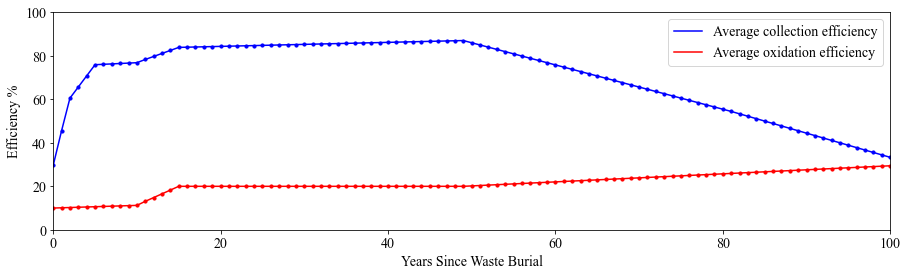

In [44]:
fig, ax=plt.subplots(figsize=(15, 4))

ax.plot(list(range(model.timescale)), model.Average_Collection.values, label='Average collection efficiency', c='b')
ax.scatter(list(range(model.timescale)), model.Average_Collection.values, c='b', s=10)
ax.plot(list(range(model.timescale)), model.Average_Oxidation.values, label='Average oxidation efficiency', c='r')
ax.scatter(list(range(model.timescale)), model.Average_Oxidation.values, c='r', s=10)
ax.set_ylim((0,100))
ax.set_xlim((0,100))
ax.set_ylabel('Efficiency %')
ax.set_xlabel('Years Since Waste Burial')
ax.legend()

In [49]:
pd.DataFrame([model.Average_Collection, model.Average_Oxidation], index=['Collection', 'Oxidation']).T.iloc[:150, :]

,Collection,Oxidation
0,29.629630,10.000000
1,45.555556,10.123457
2,60.555556,10.246914
3,65.679012,10.370370
4,70.802469,10.493827
5,75.925926,10.617284
6,76.111111,10.740741
7,76.296296,10.864198
8,76.481481,10.987654
9,76.666667,11.111111


# Model results based on the LGF collection plan

## Methane generation

,% Combusted,% Flared,% Oxidized,% Emitted
Yard_Trimmings_Leaves,35.164864,32.496045,3.718328,29.004908
Yard_Trimmings_Grass,18.977847,41.550613,4.186717,35.516152
Yard_Trimmings_Branches,44.953014,5.678810,14.512619,35.310766
Food_Waste_Vegetable,40.074413,29.482763,3.623239,27.249812
Food_Waste_Non_Vegetable,40.074413,29.482763,3.623239,27.249812
Wood,57.520005,16.791457,4.121122,22.159408
Wood_Other,57.520005,16.791457,4.121122,22.159408
Textiles,56.386935,9.510601,8.262830,26.413013
Rubber_Leather,NaN,NaN,NaN,NaN
Newsprint,57.658994,10.390851,7.345299,25.191837


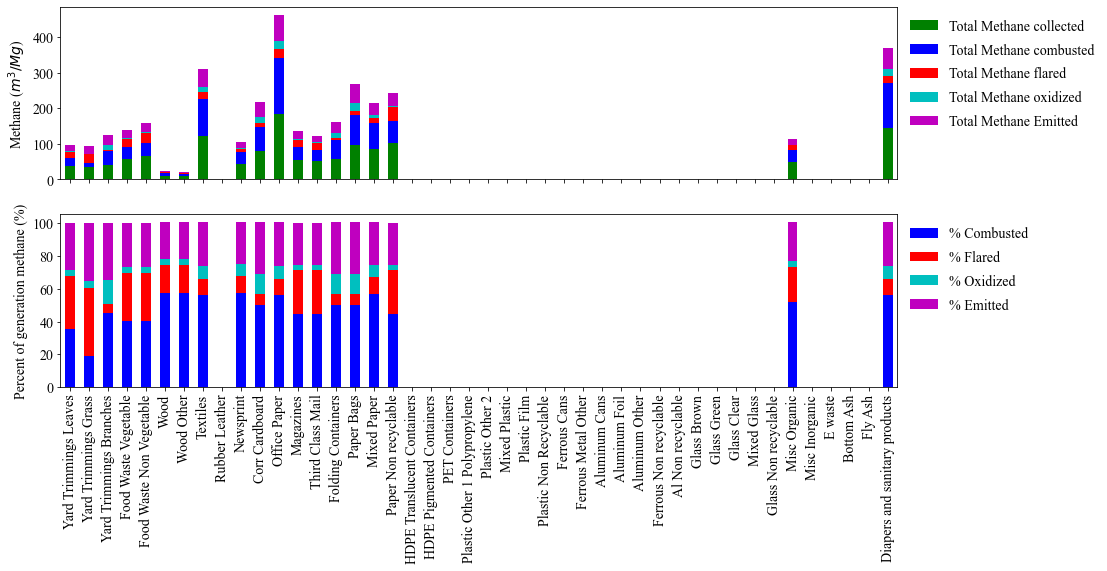

In [53]:
fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

model.LFG[['Total Methane collected', 'Total Methane combusted', 'Total Methane flared', 
           'Total Methane oxidized','Total Methane Emitted']].plot(kind='bar',
                                                                   stacked=True,
                                                                   ax=ax1,
                                                                   color=['g','b','r','c','m'])

# Create new dataframe for LFG
LFG = pd.DataFrame(index=model.Index)
# Normalizing the LFG based on the generated Methane
LFG['% Combusted'] = model.LFG['Total Methane combusted'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Flared'] = model.LFG['Total Methane flared'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Oxidized'] = model.LFG['Total Methane oxidized'].values / model.LFG['Total generated Methane'].values * 100
LFG['% Emitted'] = model.LFG['Total Methane Emitted'].values / model.LFG['Total generated Methane'].values * 100

LFG.plot(kind='bar', stacked=True, ax=ax2, color=['b','r','c','m'])

ax1.set_ylabel('Methane ($m^3/Mg$)')
ax2.set_ylabel('Percent of generation methane (%)')
ticks=ax1.set_xticklabels([])
ticks=ax2.set_xticklabels([x.replace('_',' ') for x in model.Index], rotation=90)
legend = ax1.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')
legend = ax2.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

LFG.head(12)

In [51]:
model.LFG.head(10)

,Total generated Methane,Fraction of L0 Generated,Total Methane collected,Collection Eff,Blower electricity use,Total Methane combusted,Percent of Generated used for Energy,Percent of Collected used for Energy,Electricity generated,Total Methane flared,Total Methane oxidized,Total Methane Emitted,Percent of Generated Methane Emitted,Total methane in uncollected biogas,Mass of emitted methane,Mass of CO2 generated with methane,Mass of CO2 generated with methane combustion,Mass of CO2 generated with methane oxidation,Mass of CO2 storage
Yard_Trimmings_Leaves,57.276450,1.000000,38.753767,0.676609,0.227172,20.141186,35.164864,51.972202,72.902701,18.612581,2.129726,16.612981,29.004908,18.522683,11.861669,112.490948,75.672979,4.182380,-1238.433266
Yard_Trimmings_Grass,58.006000,1.000000,35.110139,0.605285,0.205813,11.008290,18.977847,31.353594,39.845424,24.101848,2.428547,20.601499,35.516152,22.895861,14.709470,113.923784,68.686156,4.769207,-261.837245
Yard_Trimmings_Branches,82.886706,0.950708,41.967051,0.506318,0.246008,37.260072,44.953014,88.784109,134.865937,4.706979,12.029032,29.267931,35.310766,40.919655,20.897303,162.789491,81.674388,23.622742,-1140.885051
Food_Waste_Vegetable,82.460000,1.000000,57.356847,0.695572,0.336222,33.045361,40.074413,57.613628,119.610436,24.311486,2.987723,22.470195,27.249812,25.103153,16.043719,161.951440,111.941304,5.867322,-66.629428
Food_Waste_Non_Vegetable,92.904000,1.000000,64.621398,0.695572,0.378806,37.230732,40.074413,57.613628,134.759738,27.390666,3.366134,25.316166,27.249812,28.282602,18.075742,182.463456,126.119269,6.610450,-156.198790
Wood,14.381049,0.999996,10.686767,0.743115,0.062645,8.271980,57.520005,77.403947,29.941120,2.414788,0.592661,3.186755,22.159408,3.694281,2.275343,28.244379,20.819601,1.163873,-1525.329003
Wood_Other,12.708555,0.999996,9.443913,0.743115,0.055360,7.309961,57.520005,77.403947,26.459014,2.133952,0.523735,2.816140,22.159408,3.264642,2.010724,24.959601,18.398313,1.028516,-1425.890134
Textiles,185.678383,0.997375,122.357479,0.658975,0.717251,104.698349,56.386935,85.567592,378.964398,17.659131,15.342290,49.043256,26.413013,63.320904,35.016885,364.672344,238.196183,30.129355,-103.050897
Rubber_Leather,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-788.138864
Newsprint,62.449628,0.998715,42.496875,0.680498,0.249114,36.007827,57.658994,84.730529,130.333330,6.489048,4.587112,15.732209,25.191837,19.952753,11.232797,122.651069,82.735953,9.008219,-1272.509005


# Leachate

In [62]:
pd.DataFrame(model.InputData.Leachate).T.iloc[:, :3]

,Parameter Description,amount,unit
dis_POTW,Distance to POTW,40.0,km
pay_leach,Actual payload of trucks delivering leachate,35.0,Mg
er_leach,Empty return of trucks delivering leachate,1.0,None
LF_lcht_p,Collection efficiency of leachate,0.998,fraction
LF_time1,time after waste placement that recirculation or treatment begins,0.0,years
LF_time3,time after waste placement that leachate collection stops,80.0,years
LF_eff_BOD,BOD REMOVAL EFFICIENCY,92.1,%
LF_eff_COD,COD REMOVAL EFFICIENCY,80.0,%
LF_eff_NH3,NH3 REMOVAL EFFICIENCY,98.0,%
LF_eff_PO4,PO4 REMOVAL EFFICIENCY,21.6,%


In [63]:
pd.DataFrame(model.InputData.BOD).T.iloc[:, :3]

,Parameter Description,amount,unit
LF_BOD2,year period 1 ends,1.5,years
LF_BOD4,year period 2 ends,10.0,years
LF_BOD6,year period 3 ends,50.0,years
LF_BOD_con1,BOD starting concentration at period 1,0.099929,kg/L
LF_BOD_con3,BOD starting concentration at period 2,0.099929,kg/L
LF_BOD_con5,BOD starting concentration at period 3,0.009993,kg/L
LF_BOD_con2,BOD finish period 1,0.099929,kg/L
LF_BOD_con4,BOD finish period 2,0.009993,kg/L
LF_BOD_con6,BOD finish period 3,0.0,kg/L
LF_lcht_ec,electric energy consumption,1.00107,kWh / kg BOD removed


In [64]:
pd.DataFrame(model.InputData.COD).T.iloc[:, :3]

,Parameter Description,amount,unit
LF_COD2,Finish period 1,1.5,years
LF_COD4,Finish period 2,10.0,years
LF_COD6,Finish period 3,50.0,years
LF_COD_con1,COD start period 1,0.012497,kg/L
LF_COD_con3,COD start period 2,0.012497,kg/L
LF_COD_con5,COD start period 3,0.001,kg/L
LF_COD_con7,COD start period 4,0.0001,kg/L
LF_COD_con2,COD finish period 1,0.012497,kg/L
LF_COD_con4,COD finish period 2,0.003332,kg/L
LF_COD_con6,COD finish period 3,0.0001,kg/L


In [69]:
model._param3.head(10)

,year,Annual Precipitation (mm),Percent of Precipitation that Becomes Leachate (%),fraction of Leachate that is Recirculated,farction of Collected Leachate that is Sent to WWTP,Leachate Collection Efficiency (%),Generated Leachate (m3/Mg MSW),Collected Leachate (m3/Mg MSW),Recirculated Leachate (m3/Mg MSW),Treated Leachate (m3/Mg MSW),Fugitive Leachate (m3/Mg MSW),Slope of BOD Concentration vs. Time (kg/L-yr),Slope of COD Concentration vs. Time (kg/L-yr)
1,1,900,20.0,0,1,0.998,0.015544,0.015513,0.0,0.015513,0.000031,0.000000,0.000000
2,2,900,13.3,0,1,0.998,0.010337,0.010316,0.0,0.010316,0.000021,-0.010581,-0.001078
3,3,900,6.6,0,1,0.998,0.005129,0.005119,0.0,0.005119,0.000010,-0.010581,-0.001078
4,4,900,6.6,0,1,0.998,0.005129,0.005119,0.0,0.005119,0.000010,-0.010581,-0.001078
5,5,900,6.6,0,1,0.998,0.005129,0.005119,0.0,0.005119,0.000010,-0.010581,-0.001078
6,6,900,6.5,0,1,0.998,0.005052,0.005042,0.0,0.005042,0.000010,-0.010581,-0.001078
7,7,900,6.5,0,1,0.998,0.005052,0.005042,0.0,0.005042,0.000010,-0.010581,-0.001078
8,8,900,6.5,0,1,0.998,0.005052,0.005042,0.0,0.005042,0.000010,-0.010581,-0.001078
9,9,900,6.5,0,1,0.998,0.005052,0.005042,0.0,0.005042,0.000010,-0.010581,-0.001078
10,10,900,6.5,0,1,0.998,0.005052,0.005042,0.0,0.005042,0.000010,-0.010581,-0.001078


In [72]:
model.lcht_conc.head(10)

,"BOD5, Biological Oxygen Demand","COD, Chemical Oxygen Demand","Ammonium, ion","Arsenic, ion",Barium,"Cadmium, ion","Chromium, ion",Lead,Mercury,Phosphate,Selenium,"Silver, ion","Suspended solids, unspecified",Benzene,Chloroform,"Ethylene dichloride ('Ethane, 1,2-dichloro-')","Trichloroethene (Ethene, trichloro-)","Tetrachloroethene ('Ethene, tetrachloro-')","Vinyl chloride ('Ethene, chloro-')",Toluene,Xylene,"Benzene, ethyl-"
1,0.099929,0.012497,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
2,0.094639,0.011958,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
3,0.084058,0.010880,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
4,0.073477,0.009802,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
5,0.062896,0.008723,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
6,0.052316,0.007645,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
7,0.041735,0.006567,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
8,0.031154,0.005489,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
9,0.020574,0.004410,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08
10,0.009993,0.003332,0.000343,3.000000e-08,8.510000e-07,6.950000e-09,8.510000e-08,1.320000e-08,4.190000e-10,0.00001,9.710000e-09,6.590000e-08,0.000057,7.000000e-09,1.000000e-08,1.500000e-09,8.000000e-09,9.700000e-09,1.000000e-08,1.600000e-07,5.600000e-08,1.810000e-08


In [71]:
model.InputData.lcht_Alloc

,"BOD5, Biological Oxygen Demand","COD, Chemical Oxygen Demand","Ammonium, ion","Arsenic, ion",Barium,"Cadmium, ion","Chromium, ion",Lead,Mercury,Phosphate,Selenium,"Silver, ion","Suspended solids, unspecified",Benzene,Chloroform,"Ethylene dichloride ('Ethane, 1,2-dichloro-')","Trichloroethene (Ethene, trichloro-)","Tetrachloroethene ('Ethene, tetrachloro-')","Vinyl chloride ('Ethene, chloro-')",Toluene,Xylene,"Benzene, ethyl-"
Material,,,,,,,,,,,,,,,,,,,,,,
Yard_Trimmings_Leaves,0.859,2.200,3.990,0.012700,4.510,0.2390,0.03130,0.682000,1.8000,1.5500,1.150,1.150,1.150,1.150,1.150,1.150,1.150,1.150,1.150,1.150,1.150,1.150
Yard_Trimmings_Grass,0.871,0.737,2.340,0.004150,1.470,0.0783,0.01020,0.223000,0.5890,0.5070,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
Yard_Trimmings_Branches,1.310,2.230,1.790,0.012700,4.520,0.2400,0.03140,0.683000,1.8100,1.5500,1.160,1.160,1.160,1.160,1.160,1.160,1.160,1.160,1.160,1.160,1.160,1.160
Food_Waste_Vegetable,1.240,0.587,0.865,0.000839,1.060,0.0151,0.00864,0.006900,0.0327,0.4300,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274,0.274
Food_Waste_Non_Vegetable,1.390,0.784,2.050,0.002890,1.440,0.0244,0.00264,0.000629,0.0443,2.5100,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372
Wood,0.216,2.380,1.600,0.003790,0.000,0.2110,0.21800,0.466000,1.3500,0.1980,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.060,1.060
Wood_Other,0.191,2.220,2.210,0.003230,0.000,0.1800,0.18600,0.397000,1.1500,0.1690,0.908,0.908,0.908,0.908,0.908,0.908,0.908,0.908,0.908,0.908,0.908,0.908
Textiles,2.790,1.260,3.300,0.002360,0.000,0.2860,2.88000,3.640000,0.5090,1.5800,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010
Rubber_Leather,0.000,1.190,3.180,43.800000,0.000,0.6290,28.30000,3.680000,0.5690,0.2140,1.140,1.140,1.140,1.140,1.140,1.140,1.140,1.140,1.140,1.140,1.140,1.140


In [70]:
model.InputData.lcht_coef

,Emission,Surface_water,Ground_water,Concentrations (kg/L),Removal Efficiency (%)
0,"BOD5, Biological Oxygen Demand","(biosphere3, 70d467b6-115e-43c5-add2-441de9411348)","(biosphere3, 57c27ba7-a61a-4932-8cd5-095c88ff0245)",0.000000e+00,92.1
1,"COD, Chemical Oxygen Demand","(biosphere3, fc0b5c85-3b49-42c2-a3fd-db7e57b696e3)","(biosphere3, be10dd54-eb4d-48ae-9e14-7d79ce8b170d)",0.000000e+00,80.0
2,"Ammonium, ion","(biosphere3, 13331e67-6006-48c4-bdb4-340c12010036)","(biosphere3, 736f52e8-9703-4076-8909-7ae80a7f8005)",3.426820e-04,98.0
3,"Arsenic, ion","(biosphere3, 8c8ffaa5-84ed-4668-ba7d-80fd0f47013f)","(biosphere3, 1f607ae2-b42d-4411-90b8-e9bbac66a554)",3.000000e-08,85.0
4,Barium,"(biosphere3, 2c872773-0a29-4831-93b9-d49b116fa7d5)","(biosphere3, d68f41b3-6887-49a8-8efa-96812f8ec9f6)",8.510000e-07,85.0
5,"Cadmium, ion","(biosphere3, af83b42f-a4e6-4457-be74-46a87798f82a)","(biosphere3, 3937f5a5-b4a4-434d-9fc3-1d29064fc3f8)",6.950000e-09,85.0
6,"Chromium, ion","(biosphere3, e34d3da4-a3d5-41be-84b5-458afe32c990)","(biosphere3, 1c87de06-e58f-4684-a54c-d29f1a251a87)",8.510000e-08,85.0
7,Lead,"(biosphere3, b3ebdcc3-c588-4997-95d2-9785b26b34e1)","(biosphere3, c864aa15-0abc-41ad-9889-348106e485d8)",1.320000e-08,85.0
8,Mercury,"(biosphere3, 66bfb434-78ab-4183-b1a7-7f87d08974fa)","(biosphere3, e1aa92d7-9297-452e-ade0-e5e2acc52ad7)",4.190000e-10,85.0
9,Phosphate,"(biosphere3, 1727b41d-377e-43cd-bc01-9eaba946eccb)","(biosphere3, 329fc7d8-4011-4327-84e4-34ff76f0e42d)",9.990000e-06,21.6
